## Julia Exploratory Analysis

In [4]:
# --- 1. Importar bibliotecas ---
#using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Statistics")
#Pkg.add("StatsPlots")

using CSV, DataFrames, Statistics
using StatsPlots

In [5]:
# --- 2. Carregar os dados CSV ---
pokemon = CSV.read("archive/pokemon.csv", DataFrame)

Row,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,String31,String,Int64,Int64,Float64?,Int64,String,String15,Float64?,Int64,Int64,Int64,Int64,String15,String15?,Float64?,Int64,Int64
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,missing,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,missing,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
7,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,missing,9.0,1,0
8,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,missing,22.5,1,0
9,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,missing,85.5,1,0


In [6]:
# --- 3. Primeira visão dos dados ---
println("📊 Tamanho da tabela:")
println("Table (lines, cols): ", size(pokemon))



📊 Tamanho da tabela:
Table (lines, cols): (801, 41)


In [7]:
# Visualizar primeiras linhas
first(pokemon, 5)

Row,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,String31,String,Int64,Int64,Float64?,Int64,String,String15,Float64?,Int64,Int64,Int64,Int64,String15,String15?,Float64?,Int64,Int64
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,missing,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,missing,19.0,1,0


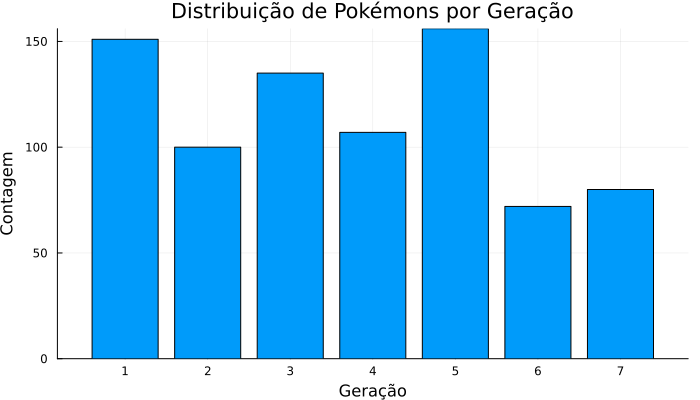

In [9]:
# --- 4. Distribuição por geração ---

# agregando contagem por geração
gen_counts = combine(groupby(pokemon, :generation), nrow => :count)
sort!(gen_counts, :generation)

@df gen_counts bar(
    :generation, :count,
    legend = false,
    xlabel = "Geração",
    ylabel = "Contagem",
    title  = "Distribuição de Pokémons por Geração",
    xticks = :all,
    xrotation = 0,
    size = (700, 400)
)

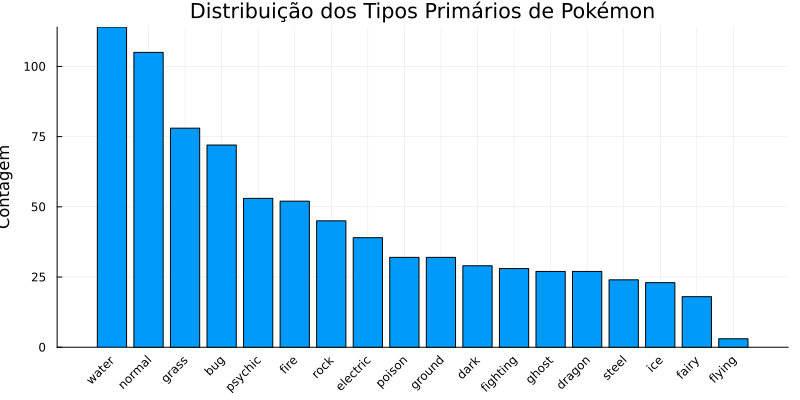

In [10]:
# --- 5. Distribuição de tipos primários ---

type_counts = combine(groupby(pokemon, :type1), nrow => :count)
sort!(type_counts, :count, rev = true)

@df type_counts bar(
    :type1, :count,
    legend = false,
    xlabel = "Tipo Primário",
    ylabel = "Contagem",
    title  = "Distribuição dos Tipos Primários de Pokémon",
    xticks = :all,
    xrotation = 45,
    size = (800, 400)
)



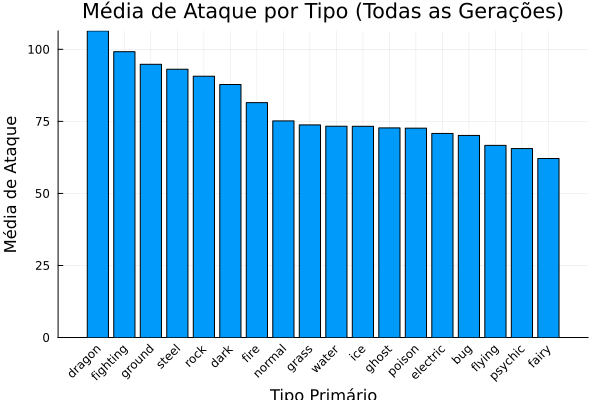

In [14]:
# --- 6. Média de ataque por tipo  ---

# Calcula a média de ataque por tipo para todas as gerações
# O filtro para a Geração 1 foi removido
attack_mean_by_type = combine(groupby(pokemon, :type1), :attack => mean => :attack_mean)

# Ordena os tipos pela média de ataque, do maior para o menor
sort!(attack_mean_by_type, :attack_mean, rev=true)

# Cria o gráfico
@df attack_mean_by_type bar(:type1, :attack_mean, legend=false,
    xlabel="Tipo Primário",
    ylabel="Média de Ataque",
    title="Média de Ataque por Tipo (Todas as Gerações)",
    xticks=:all,
    xrotation=45
)
